In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
df=pd.read_csv('mumbai-monthly-rains.csv')
df=df.round(decimals = 2)
print(df.info())
print("Data heads:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB
None
Data heads:
   Year    Jan   Feb    Mar  April     May    June    July     Aug    Sept  \
0  1901  13.12  0.00   0.00   3.95   17.14  640.71  888.37  545.05   64.27   
1  1902   0.00  0.00   0.00   0.00    0.36  248.00  408.43  566.60  688.91   


In [72]:
print(df.isnull().sum())

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64


In [73]:
print("\n\nShape: ",df.shape)



Shape:  (121, 14)


In [74]:
df.Year.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

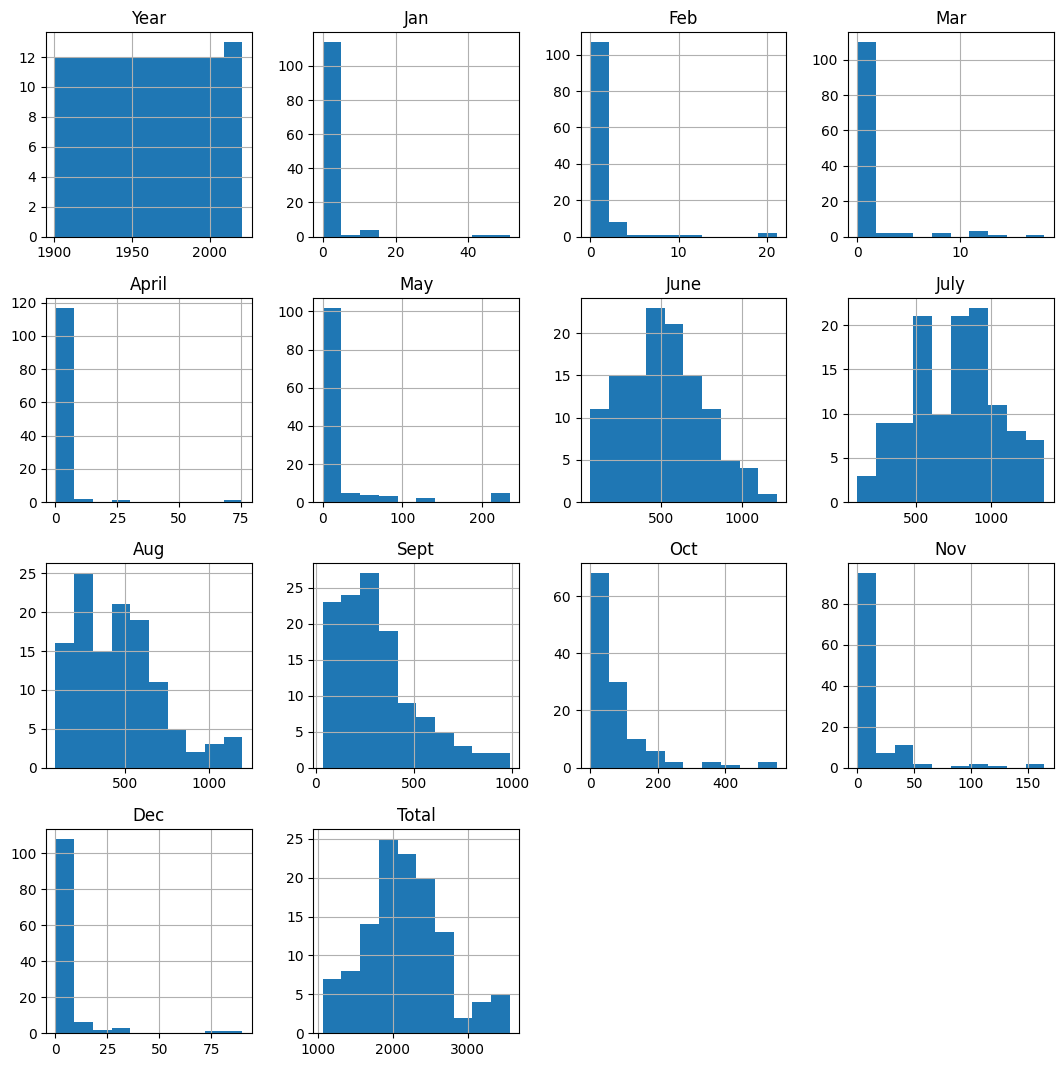

In [75]:
df.hist(figsize=(13,13))
plt.show()

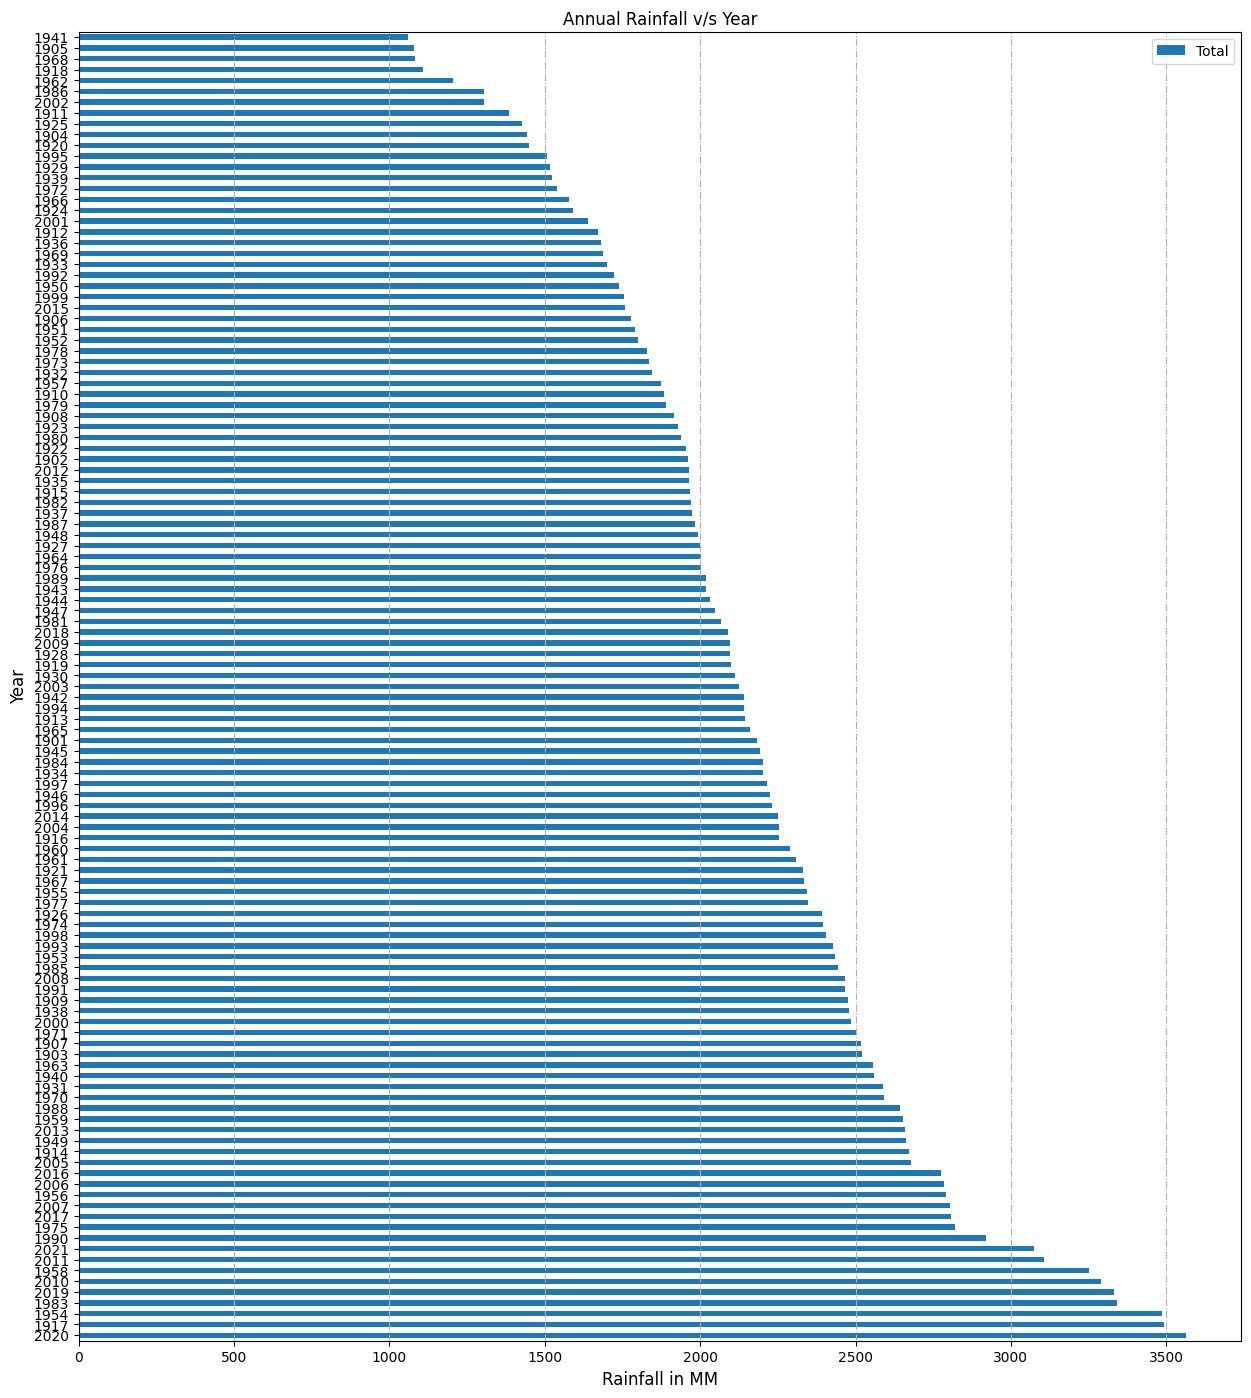

In [76]:
#Yearwise rainfall variation 
df[["Year","Total"]].groupby("Year").sum().sort_values(by='Total',ascending=False).plot(kind='barh',stacked=True,figsize=(15,17))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Year",size=12)
plt.title("Annual Rainfall v/s Year")
plt.grid(axis="x",linestyle="-.")
plt.show()

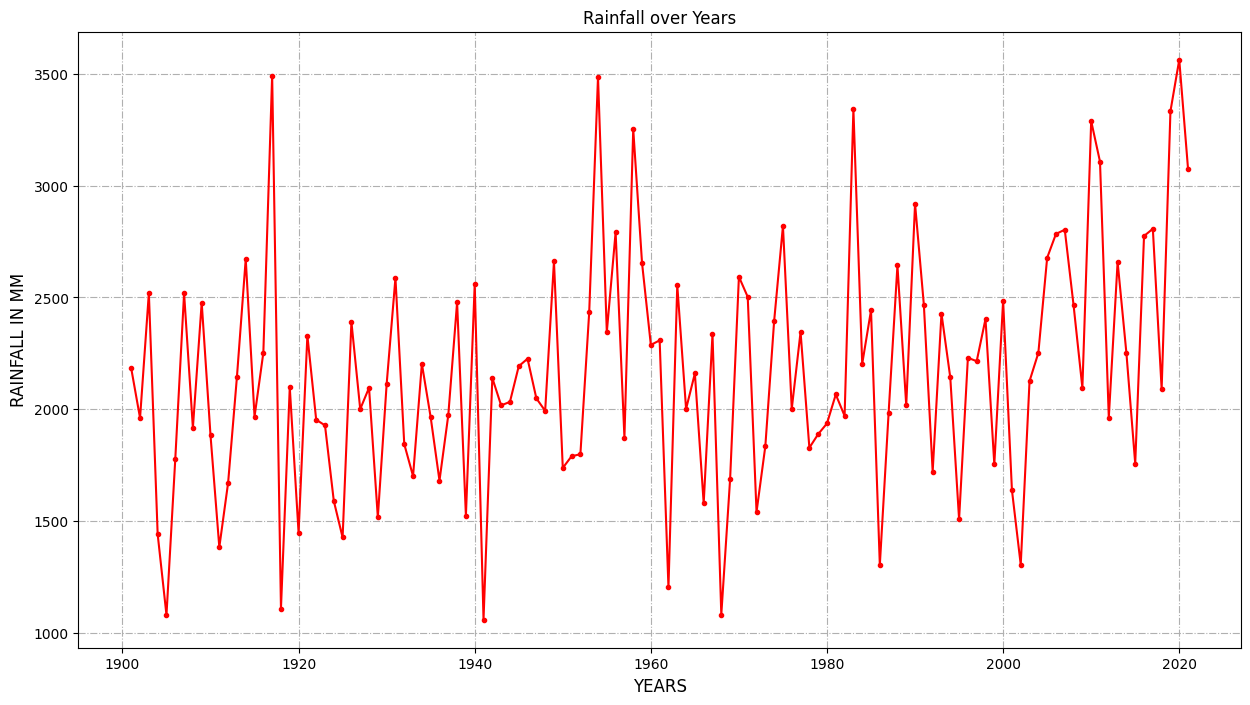

In [77]:
plt.figure(figsize=(15,8))
df.groupby("Year").sum()['Total'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

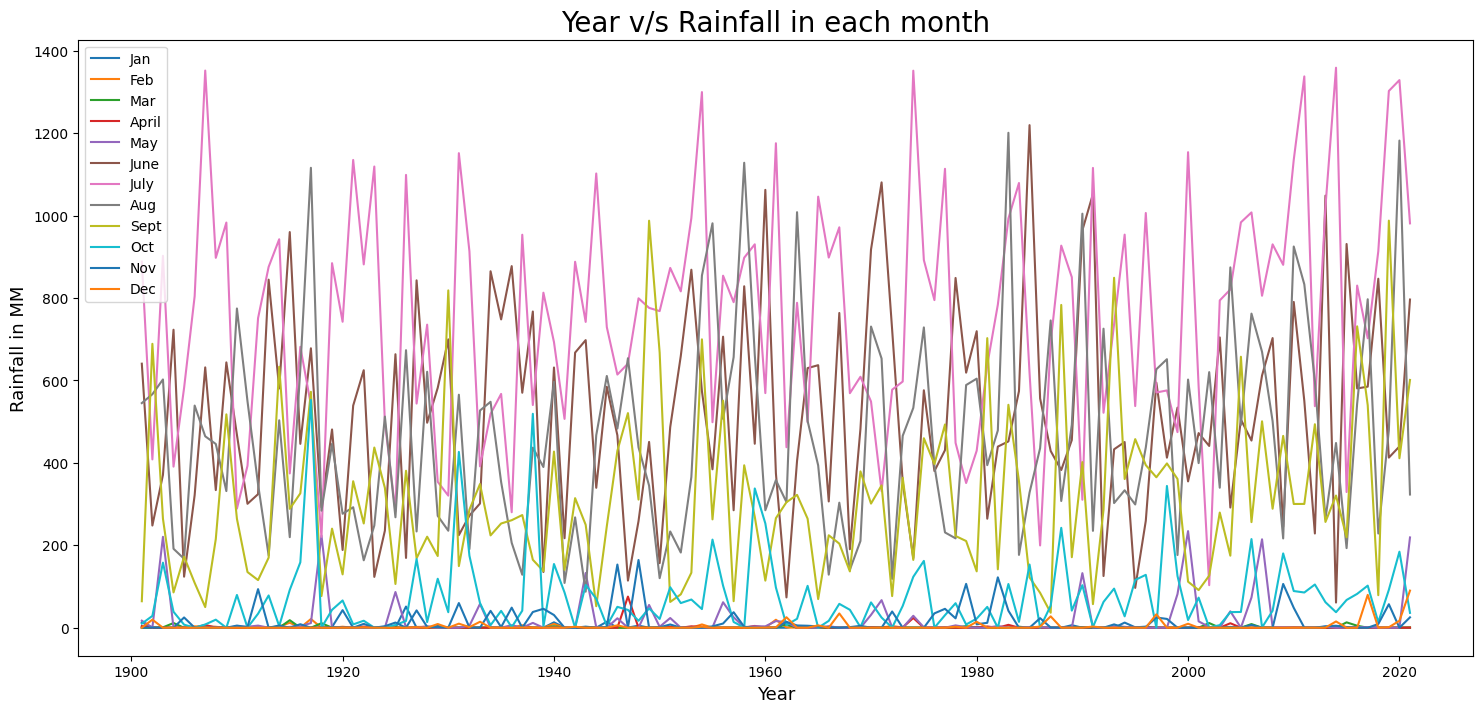

In [78]:
df[['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July','Aug', 'Sept',
      'Oct', 'Nov', 'Dec']].groupby("Year").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

Above plot shows the Year vs Rainfall in each month,  we observe that:-  July has heavy rainfall  and Feb has least rainfall 

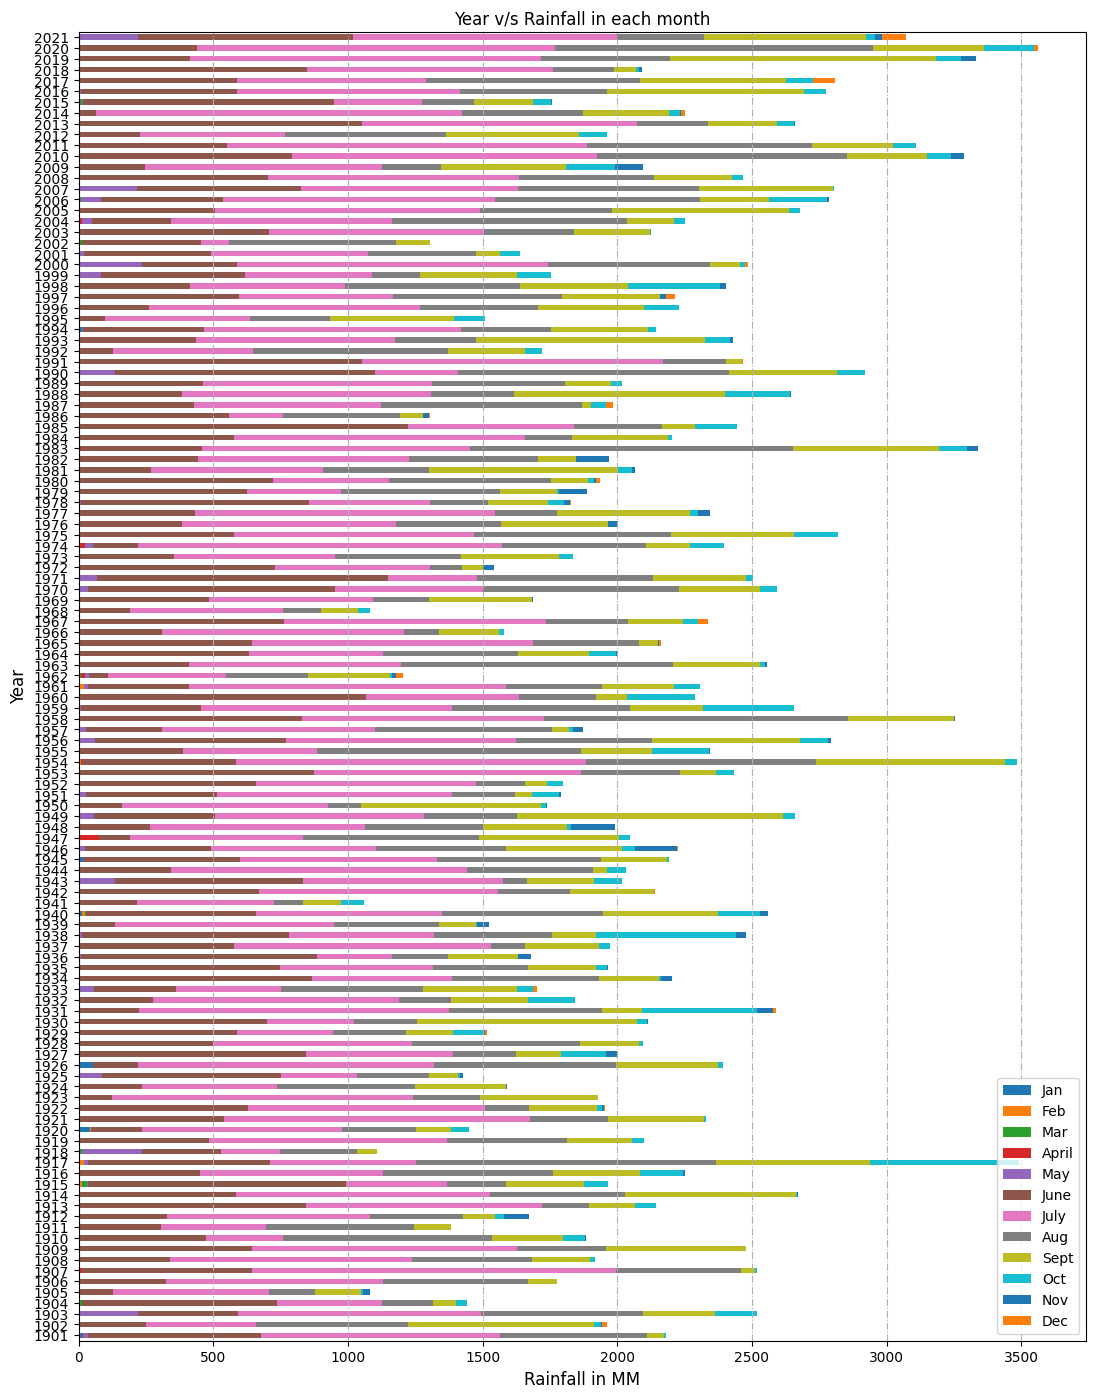

In [79]:
df[[ 'Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July','Aug', 'Sept',
      'Oct', 'Nov', 'Dec']].groupby("Year").sum().plot(kind="barh",stacked=True,figsize=(13,17))
plt.title("Year v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Year",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

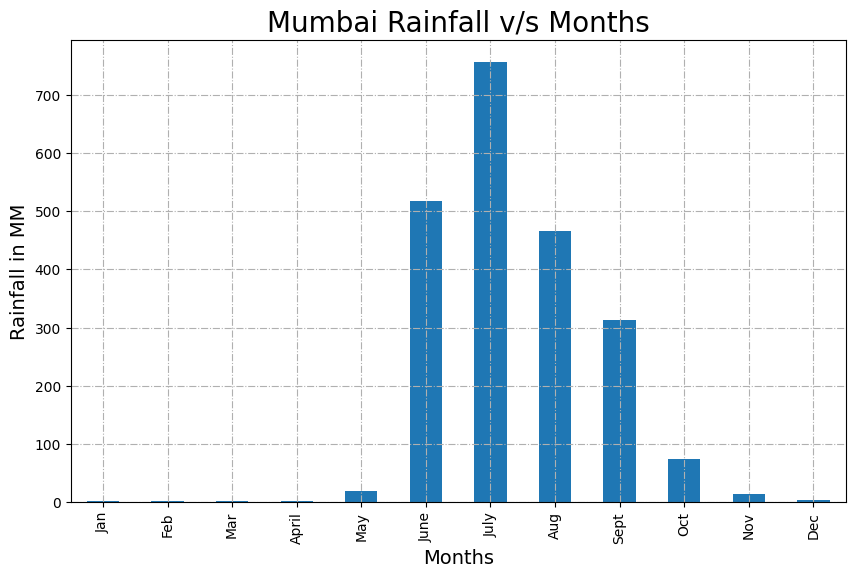

In [81]:
plt.figure(figsize=(10,6))
df[[  'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July','Aug', 'Sept',
      'Oct', 'Nov', 'Dec']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Mumbai Rainfall v/s Months",size=20)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

Mumbai receives more rainfall in july month more than 750mm of rainfall

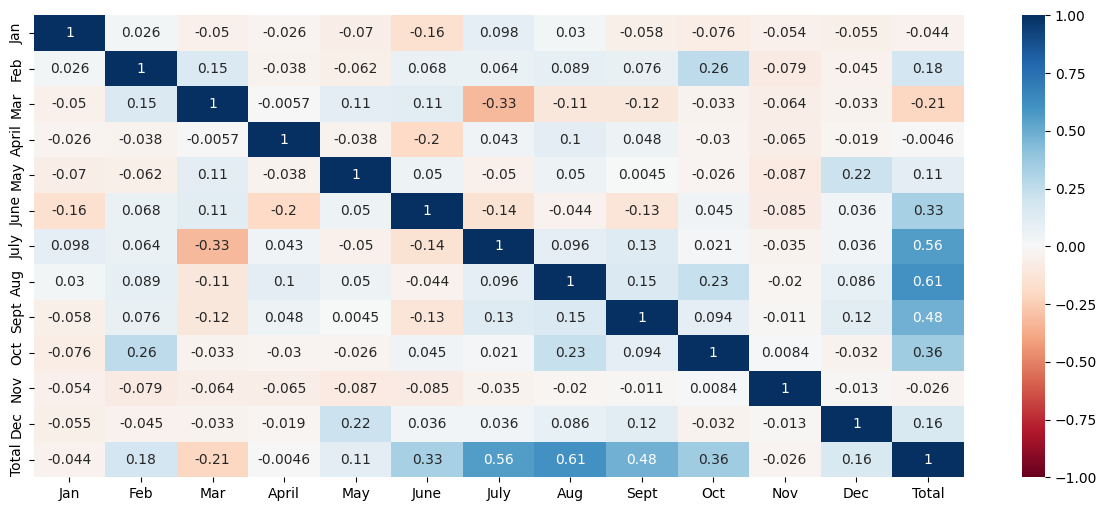

In [82]:
# correlation b/w each numeric attribute
plt.figure(figsize=(15,6))
sns.heatmap(df[['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July','Aug', 'Sept',
      'Oct', 'Nov', 'Dec','Total']].corr(),cmap='RdBu',vmin=-1,vmax=1,annot=True)
plt.show()

Modelling

In [83]:
df_M=pd.melt(df,id_vars=['Year'],var_name='Month',value_name='RainFall(mm)')
df_M.head()

,Year,Month,RainFall(mm)
0,1901,Jan,13.12
1,1902,Jan,0.00
2,1903,Jan,0.00
3,1904,Jan,0.00
4,1905,Jan,0.66


The above code tranpose the dataset where months are transposed

In [84]:
# df_M.Year.unique()
print(df_M.describe())
t=df_M.iloc[:,:-1].values
t1=df_M.iloc[:,-1].values
print(t)


              Year  RainFall(mm)
count  1573.000000   1573.000000
mean   1961.000000    333.556306
std      34.939606    617.788265
min    1901.000000      0.000000
25%    1931.000000      0.000000
50%    1961.000000      8.940000
75%    1991.000000    430.920000
max    2021.000000   3563.260000
[[1901 'Jan']
 [1902 'Jan']
 [1903 'Jan']
 ...
 [2019 'Total']
 [2020 'Total']
 [2021 'Total']]


In [85]:
Month_map={'Jan':1,'Feb':2,'Mar' :3,'April':4,'May':5,'June':6,'July':7,'Aug':8,'Sept':9,
   'Oct':10,'Nov':11,'Dec':12}
df_M['Month']=df_M['Month'].map(Month_map)
df_M.head(12)

,Year,Month,RainFall(mm)
0,1901,1.0,13.12
1,1902,1.0,0.00
2,1903,1.0,0.00
3,1904,1.0,0.00
4,1905,1.0,0.66
5,1906,1.0,0.00
6,1907,1.0,2.52
7,1908,1.0,1.78
8,1909,1.0,0.00
9,1910,1.0,0.00


above converts string month values to num for better prediction

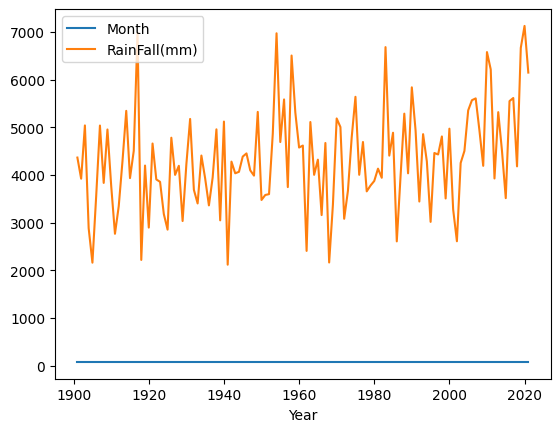

In [86]:
df_M.groupby("Year").sum().plot()
plt.show()

In [87]:
X=np.asanyarray(df_M[['Year','Month']]).astype('int')
y=np.asanyarray(df_M['RainFall(mm)']).astype('int')
print(X.shape)
print(y.shape)

(1573, 2)
(1573,)


C:\Users\490723\AppData\Local\Temp\ipykernel_26672\2785089546.py:1: RuntimeWarning: invalid value encountered in cast
  X=np.asanyarray(df_M[['Year','Month']]).astype('int')


In [88]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Linear Regression Model

In [89]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [90]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

visualizing the test result

In [94]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test_predict.reshape(len(y_test_predict),1),y_test.reshape(len(y_test),1)),1))

[[1.54e+02 0.00e+00]
 [1.99e+02 3.43e+02]
 [2.14e+03 2.44e+03]
 [1.99e+02 0.00e+00]
 [2.08e+02 0.00e+00]
 [1.46e+02 6.00e+00]
 [1.60e+02 1.15e+03]
 [1.93e+02 0.00e+00]
 [1.45e+02 1.00e+00]
 [1.53e+02 0.00e+00]
 [1.89e+02 2.64e+02]
 [2.12e+03 2.43e+03]
 [1.95e+02 0.00e+00]
 [1.52e+02 5.40e+02]
 [1.54e+02 7.42e+02]
 [1.86e+02 8.92e+02]
 [1.99e+02 0.00e+00]
 [1.48e+02 5.00e+00]
 [1.94e+02 0.00e+00]
 [2.13e+03 1.84e+03]
 [1.63e+02 0.00e+00]
 [2.12e+03 2.31e+03]
 [1.77e+02 2.85e+02]
 [1.81e+02 0.00e+00]
 [1.92e+02 2.30e+01]
 [2.04e+02 0.00e+00]
 [1.86e+02 0.00e+00]
 [1.45e+02 0.00e+00]
 [1.64e+02 1.28e+02]
 [1.99e+02 2.10e+01]
 [1.69e+02 5.00e+01]
 [1.72e+02 8.73e+02]
 [1.93e+02 4.28e+02]
 [1.96e+02 0.00e+00]
 [1.59e+02 0.00e+00]
 [1.63e+02 0.00e+00]
 [2.08e+02 4.93e+02]
 [1.76e+02 0.00e+00]
 [2.14e+03 2.47e+03]
 [2.02e+02 0.00e+00]
 [2.01e+02 0.00e+00]
 [2.12e+02 0.00e+00]
 [1.78e+02 7.30e+01]
 [2.05e+02 0.00e+00]
 [1.84e+02 0.00e+00]
 [1.96e+02 0.00e+00]
 [2.11e+02 7.90e+01]
 [1.68e+02 6.

comparing bot the prediction and actuals as vertical verctors for comparision

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_predict)

0.7774876015987933

Polynomial regression model

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
p_regressor=LinearRegression()
p_regressor.fit(X_poly, y_train)

LinearRegression()

Prdicting TestResults

In [97]:
p_y_pred_test=p_regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((p_y_pred_test.reshape(len(p_y_pred_test),1),y_test.reshape(len(y_test),1)),1))

[[1.64e+02 0.00e+00]
 [1.90e+02 3.43e+02]
 [2.22e+03 2.44e+03]
 [1.90e+02 0.00e+00]
 [1.95e+02 0.00e+00]
 [1.60e+02 6.00e+00]
 [1.68e+02 1.15e+03]
 [1.86e+02 0.00e+00]
 [1.59e+02 1.00e+00]
 [1.63e+02 0.00e+00]
 [1.84e+02 2.64e+02]
 [2.10e+03 2.43e+03]
 [1.87e+02 0.00e+00]
 [1.63e+02 5.40e+02]
 [1.64e+02 7.42e+02]
 [1.82e+02 8.92e+02]
 [1.90e+02 0.00e+00]
 [1.61e+02 5.00e+00]
 [1.87e+02 0.00e+00]
 [2.17e+03 1.84e+03]
 [1.69e+02 0.00e+00]
 [2.13e+03 2.31e+03]
 [1.77e+02 2.85e+02]
 [1.79e+02 0.00e+00]
 [1.86e+02 2.30e+01]
 [1.93e+02 0.00e+00]
 [1.82e+02 0.00e+00]
 [1.59e+02 0.00e+00]
 [1.70e+02 1.28e+02]
 [1.90e+02 2.10e+01]
 [1.73e+02 5.00e+01]
 [1.74e+02 8.73e+02]
 [1.86e+02 4.28e+02]
 [1.88e+02 0.00e+00]
 [1.67e+02 0.00e+00]
 [1.69e+02 0.00e+00]
 [1.95e+02 4.93e+02]
 [1.77e+02 0.00e+00]
 [2.24e+03 2.47e+03]
 [1.92e+02 0.00e+00]
 [1.91e+02 0.00e+00]
 [1.98e+02 0.00e+00]
 [1.78e+02 7.30e+01]
 [1.94e+02 0.00e+00]
 [1.81e+02 0.00e+00]
 [1.88e+02 0.00e+00]
 [1.97e+02 7.90e+01]
 [1.72e+02 6.

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test,p_y_pred_test)

0.7841691091479243